<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Take-notice!" data-toc-modified-id="Take-notice!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Take notice!</a></span></li><li><span><a href="#Point-Pattern-Analysis" data-toc-modified-id="Point-Pattern-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Point Pattern Analysis</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Crime-Data" data-toc-modified-id="Crime-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Crime Data</a></span><ul class="toc-item"><li><span><a href="#Pause!" data-toc-modified-id="Pause!-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Pause!</a></span></li></ul></li><li><span><a href="#Heat-maps" data-toc-modified-id="Heat-maps-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Heat maps</a></span></li><li><span><a href="#Batch-exploration" data-toc-modified-id="Batch-exploration-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Batch exploration</a></span></li><li><span><a href="#Seaborn-Plots" data-toc-modified-id="Seaborn-Plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Seaborn Plots</a></span><ul class="toc-item"><li><span><a href="#Visualizing-statistical-relationships" data-toc-modified-id="Visualizing-statistical-relationships-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Visualizing statistical relationships</a></span></li><li><span><a href="#Seaborn-themes" data-toc-modified-id="Seaborn-themes-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Seaborn themes</a></span></li><li><span><a href="#Choosing-colors" data-toc-modified-id="Choosing-colors-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Choosing colors</a></span></li><li><span><a href="#Filter-by-location-(e.g.-Hollywood)" data-toc-modified-id="Filter-by-location-(e.g.-Hollywood)-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Filter by location (e.g. Hollywood)</a></span></li></ul></li><li><span><a href="#Joint-plots" data-toc-modified-id="Joint-plots-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Joint plots</a></span></li><li><span><a href="#Add-a-basemap-to-seaborn-jointplots" data-toc-modified-id="Add-a-basemap-to-seaborn-jointplots-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Add a basemap to seaborn jointplots</a></span></li><li><span><a href="#Hex-binning" data-toc-modified-id="Hex-binning-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Hex-binning</a></span></li><li><span><a href="#Centrography" data-toc-modified-id="Centrography-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Centrography</a></span><ul class="toc-item"><li><span><a href="#Central-tendency" data-toc-modified-id="Central-tendency-2.9.1"><span class="toc-item-num">2.9.1&nbsp;&nbsp;</span>Central tendency</a></span></li><li><span><a href="#Mean-center" data-toc-modified-id="Mean-center-2.9.2"><span class="toc-item-num">2.9.2&nbsp;&nbsp;</span>Mean center</a></span></li><li><span><a href="#Median-center" data-toc-modified-id="Median-center-2.9.3"><span class="toc-item-num">2.9.3&nbsp;&nbsp;</span>Median center</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-2.9.4"><span class="toc-item-num">2.9.4&nbsp;&nbsp;</span>Interpretations</a></span></li><li><span><a href="#Dispersion-and-Orientation" data-toc-modified-id="Dispersion-and-Orientation-2.9.5"><span class="toc-item-num">2.9.5&nbsp;&nbsp;</span>Dispersion and Orientation</a></span></li></ul></li><li><span><a href="#Create-a-function" data-toc-modified-id="Create-a-function-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Create a function</a></span></li></ul></li><li><span><a href="#Resources" data-toc-modified-id="Resources-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>


# Point Pattern Analysis

<img src="images/pp.png">

In our previous lab, we looked at spatial autocorrelation as a means to extract statistical significance in our data's spatial clustering tendencies. We did so by summarizing point data by small geographic boundaries, spatially joining arrest data to census block groups. But what if we did not care to summarize data by geographic boundaries, but rather simply look at the the location of points to deduct statistical spatial patterns? In this lab, we look at various methods to conduct point pattern analysis.

Point pattern analysis is concerned with the visualization, description, statistical characterization, and modeling of point patterns, trying to understand the generating process that gives rise and explains the observed data. Common questions in this domain include:

- What does the pattern look like?

- What is the nature of the distribution of points?

- Are there any structures in the way locations are arranged over space? That is, are events clustered? Or are they dispersed?

- Why do events occur in those places and not in others?

## Libraries

New this week!

Welcome [seaborn](https://seaborn.pydata.org/index.html) and [centrography](http://pysal.org/notebooks/explore/pointpats/centrography.html)

<img src="images/seaborn.png">

<img src="images/centrography.png">

In [ ]:
# manually install this library first
!pip install pointpats

In [ ]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

## Crime Data

We will use crime data from the LAPD for this lab. 
- [Crime Data from 2020 to Present](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8)


### Pause!

Let's take a moment to consider the data we are bringing in. 

- How is "crime" reported by the LAPD? 

- How is it different from "arrest" data?

- What is in the data, and what is not in the data? 

- Is there any data bias here, i.e., is the data an accurate representation of the population or phenomenon of study?

In [ ]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("2nrs-mtv8", 
                     limit=50000,
                     where = "date_rptd >= '2023-01-01T00:00:00'",
                     order='date_rptd desc')

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [ ]:
# If unable to download data, use the following csv file
# df = pd.read_csv('data/crime.csv')

In [ ]:
df.shape

In [ ]:
# convert pandas dataframe to geodataframe
gdf = gpd.GeoDataFrame(df, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df.lon, df.lat))

In [ ]:
# convert lat/lon to floats
gdf.lon = gdf.lon.astype('float')
gdf.lat = gdf.lat.astype('float')
gdf.vict_age = gdf.vict_age.astype('int')

In [ ]:
# drop the unmapped rows
gdf = gdf[gdf.lon!=0]

In [ ]:
# filter columns
gdf=gdf[['date_rptd','area_name','vict_age','vict_sex','vict_descent','crm_cd_desc','geometry']]

In [ ]:
# rename columns
gdf.columns = ['date','area_name','age','sex','race','crime','geometry']

In [ ]:
# project to web mercator
gdf=gdf.to_crs('EPSG:3857')

In [ ]:
# drop rows with null values
gdf = gdf.dropna()

In [ ]:
# drop rows where age == 0
gdf = gdf[gdf.age!=0]

In [ ]:
gdf.shape

In [ ]:
gdf.sample(20)

## Heat maps
This lab will focus on visualing point densities in a variety of ways. Before we begin, let's have a look at the crime data in its "raw" format, by simply creating a point map: a single point for its given location on a grid.

In [ ]:
gdf.plot(figsize=(12,12),
             markersize=0.5)

The resulting plot tells us a lot about the data we have imported into the notebook. The overall shape, if you are familiar with Los Angeles, gives a sense of the physical space that is defined by its city boundary. Even in the absence of basemaps, satellite imagery, and other layers of information, the divided city of angels comes to life: from the "valley" in the northwest, the empty white space that is the Santa Monica Mountains on the west, the blob in center right that defines the contours of downtown Los Angeles, accentuated by the pathway to the port heading south towards Long Beach. And through this cacophony of points, we can begin to detect point patterns that delineate streets and certain neighborhoods appear to be more concentrated than others. 

While the visual interpretation can be rich and informative, let's begin a statistical exploration of the point patterns.

## Batch exploration

We can explore our data through batch output explorations. To do so, we:

- define a parameter of interest (e.g. crime type)
- create a list of desired outputs (e.g. top 10 crime types)
- create a function the generates desired visualization (e.g. a map for a given crime type)
- loop and run the function for each item in the list

For this section, we will build an interactive map of Los Angeles showing the location of arrests by arrest type. A dropdown menu will allow you to change the crime type and update the map.

In order to create a dropdown of crime types, we need to create a list of them.

In [ ]:
gdf.crime.value_counts()

That's quite a lot of categories. Let's narrow it down to the top 10, and put it in a list variable `top_10_crimes`.

In [ ]:
# get the top 50 crime types into a list
top_10_crimes = gdf.crime.value_counts().head(10).index.tolist()
top_10_crimes

If we were then to produce a slice of the data for a single crime type:

In [ ]:
gdf[gdf.crime == 'BATTERY - SIMPLE ASSAULT'].head()

Let's put this all together in a single cell, adding a map output:

In [ ]:
# crime variable
crime = 'BATTERY - SIMPLE ASSAULT'

# map
ax = gdf[gdf.crime == crime].plot(figsize=(9,9),
    markersize=3 ,
    column='sex',
    legend=True,
    alpha=0.6,
    cmap='brg')

# title (including count)
ax.set_title(crime + ' (' + str(len(gdf[gdf.crime == crime])) + ' records)')

# zoom to extent of crime points total bounds
minx,miny,maxx,maxy = gdf.total_bounds

# set the x and y limits manually
ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

Now that we have a desired output based on code in a single cell, create a function. Notice how `crime` is a required argument.

In [ ]:
# create a function
def crime_by_type(crime='BATTERY - SIMPLE ASSAULT'):
    
    # map
    ax = gdf[gdf.crime == crime].plot(figsize=(5,5),
        markersize=3 ,
        column='sex',
        legend=True,
        alpha=0.6,
        cmap='brg')
    
    # zoom to extent of crime points total bounds
    minx,miny,maxx,maxy = gdf.total_bounds

    # set the x and y limits manually
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)

    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(crime + ' (' + str(len(gdf[gdf.crime == crime])) + ' records)',fontsize=8)

    # basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
# call the function for a different crime type
crime_by_type()

Next, we use a loop to generate multiple outputs for our function.

In [ ]:
# loop through top 10 crimes
for crime in top_10_crimes:
    crime_by_type(crime = crime)


<div class="alert alert-info">
Now it's your turn! Create multiple maps with a loop for a different column (e.g. area_name, race, sex).
    
</div>

## Seaborn Plots
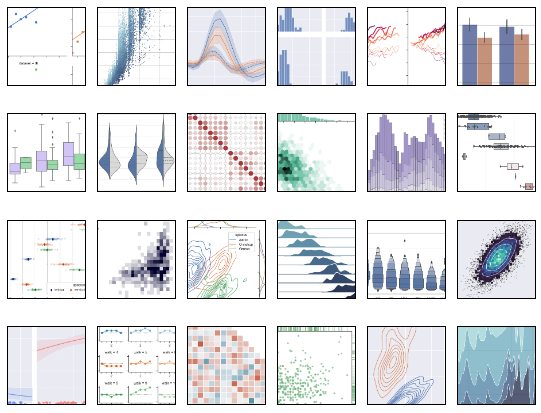
We have explored data vizualization through [matplotlib](https://matplotlib.org/) (static images) and [plotly](https://plot.ly/python/) (interactive javascript). We will now look at [seaborn](https://seaborn.pydata.org/), the natural third wheel of the python visualization trifecta. Seaborn is favored by statisticians for its advanced capabilities, and by designers for its more flexible and intuitive graphical features.

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

-https://seaborn.pydata.org/

In [ ]:
# seaborn needs an x and y column so let's extract it from the geometry field
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

In [ ]:
gdf.head()

### Visualizing statistical relationships

- https://seaborn.pydata.org/tutorial/relational.html

In [ ]:
# scatterplot
sns.relplot(data=gdf,
            x='x', 
            y='y',
            s=3, # size of point
            height=8 # size of plot
           )

### Seaborn themes

- https://seaborn.pydata.org/tutorial/aesthetics.html

You can set different themes by choosing one of the following:
- darkgrid
- whitegrid
- dark
- white
- ticks

In [ ]:
# seaborn comes with themes to make them prettier
sns.set_style('darkgrid')

# scatterplot 
sns.relplot(data=gdf,
            x='x', 
            y='y',
            s=3,
            height=8)

In [ ]:
# function
def sns_styles(style='darkgrid'):
    # seaborn comes with themes to make them prettier
    sns.set_style(style)

    # scatterplot 
    sns.relplot(data=gdf,
                x='x', 
                y='y',
                s=3,
                height=4)

In [ ]:
# loop
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    sns_styles(style = style)

### Choosing colors
Here is a list of valid palette values:

In [ ]:
color_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [ ]:
# scatterplot colored by area
sns.relplot(data=gdf,
            x='x', 
            y='y',
            hue='area_name',
            palette='tab20',
            s=5,
            height=8)

### Filter by location (e.g. Hollywood)

In [ ]:
sns.relplot(data=gdf[gdf['area_name']=='Hollywood'],
            x='x', 
            y='y')

In [ ]:
# color by categorical column
sns.relplot(data=gdf[gdf['area_name']=='Hollywood'],
            x='x', 
            y='y',
            hue='sex')

In [ ]:
# style markers
sns.relplot(data=gdf[gdf['area_name']=='Hollywood'],
            x='x', 
            y='y',
            hue='sex',
            style='sex')

In [ ]:
# create multiple plots at once with facets
sns.relplot(data=gdf[gdf['area_name']=='Hollywood'],
            x='x', 
            y='y',
            hue='sex',
            style='sex',
            col='race',
            col_wrap=2
           )

## Joint plots

- https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
# scatterplot with edges
g = sns.jointplot(data = gdf,
                  x='x', 
                  y='y',
                  s=10)

## Add a basemap to seaborn jointplots

While I was unable to add a basemap to seaborn relplots, it does seem possible to do so for jointplots:

In [ ]:
# add a basemap to jointplots
# scatterplot with edges
sns.set_style('white')
g = sns.jointplot(data = gdf,
                  x='x', 
                  y='y',
                  s=10,
                  height=8 # make the map bigger
                 )

# Clean axes (optional)
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint)

## Hex-binning

Plotting points on top of one another makes it difficult to determine the level of density in the high cluster areas. Hex-binning is a two-dimensional spatial histogram, providing an algorithm that counts the number of instances given a spatial grid.

In [ ]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and using the viridis colormap
hb = ax.hexbin(
    x = gdf['x'], 
    y = gdf['y'],
    gridsize=100, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off');

In [ ]:
# create a subset of the data
gdf_HBW = gdf[gdf.race.isin(['H','B','W'])]

In [ ]:
# color code by race
g = sns.jointplot(data = gdf_HBW,
                  x='x', 
                  y='y',
                  hue='race',
                  s=10,
                  height=10 # make the map bigger
                 )

# Clean axes
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint)



## Centrography

Centrography refers to a set of descriptive statistics that provide summary descriptions of point patterns. Here, we look at two features: **central tendency** using mean center and median center and **dispersion and orientation** using a standard deviational ellipse.

- http://pysal.org/notebooks/explore/pointpats/centrography.html

### Central tendency

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20200421144010724-0711:9781108614528:49898fig3_1.png" width=800>

Calculating the mean and median centers of point data allow us to visualize the global "center" of the point dataset. While this in itself may not be that informative, creating slices of your data can reveal meaningful insights on the central tendencies of different aspects of the data. For example, the statistical central locations may differ by crime type, allowing one to question why this may be the case.

### Mean center

- Mean center is the geographic center for a set of spatial features. It is a measure of central tendency and is calculated as the average of the xi and yi values of the centroids of the spatial features

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20200421144010724-0711:9781108614528:49898fig3_2.png?pub-status=live" width=800>

### Median center

- Median center is a point that minimizes the travel cost (e.g., distance) from the point itself to all other points (centroids in the case of polygons) in the dataset

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20200421144010724-0711:9781108614528:49898fig3_3.png?pub-status=live" width=800>

### Interpretations

- What are uses for mean center?
- What are uses for the median center?

In [ ]:
# compute the mean and median centers
mean_center = centrography.mean_center(gdf[['x','y']])
med_center = centrography.euclidean_median(gdf[['x','y']])

In [ ]:
# Generate scatter plot
g = sns.jointplot(
    x='x', y='y', data=gdf, s=0.75, height=9
)

# Add mean point and marginal lines
# *mean_center is shortcut for x=mean_center[0],y=mean_center[1]
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(g.ax_joint, source=ctx.providers.CartoDB.Positron)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()


### Dispersion and Orientation

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20200421144010724-0711:9781108614528:49898fig3_8.png?pub-status=live" width=800>

In addition to the center mean and median, the directional distribution of the points can reveal additional insights to how the data is dispersed over space. This can be visualized using a standard deviational ellipse, where the standard deviations are calculated for the x and y coordinates from the mean center. The ellipse is rotated based on the orientation of the data.

In [ ]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

In [ ]:
mean_center

In [ ]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

## Create a function

Now let's put it all together. The following function does:

- has arguments for area and crime
- maps crime location points
- maps center mean and median
- displays standard deviational ellipsoid

In [ ]:
def crime_ellipse(area, crime):
    
    # filter the data by race
    crime_filtered = gdf[(gdf.crime == crime) & (gdf.area_name == area)]

    # mean center and median
    mean_center = centrography.mean_center(crime_filtered[['x','y']])
    med_center = centrography.euclidean_median(crime_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(crime_filtered[['x','y']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(5, 5))

    # plot crime points
    ax.scatter(crime_filtered['x'], crime_filtered['y'], s=3)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    # add the legend
    ax.legend()

    # no axix
    ax.axis('Off')

    # add a dynamic title
    ax.set_title(area + ': ' + str(len(crime_filtered)) + ' incidents of "' + crime + '" (September to present 2021)',fontsize=8)

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    # Display
    plt.show()

In [ ]:
# call the function for a single area and a single crime type
crime_ellipse(area='West LA',crime='ROBBERY')

In [ ]:
# get top 10 areas
top10areas = gdf['area_name'].value_counts().head(10).index.tolist()
top10areas

In [ ]:
# get top 10 crimes
top10crimes = gdf['crime'].value_counts().head(10).index.tolist()
top10crimes

In [ ]:
# a double loop to produce 100 maps!
for area in top10areas:
    for crime in top10crimes:
        crime_ellipse(area = area, crime = crime)

# Resources

- https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html
- [Cambridge Core: Spatial Analysis Methods and Practice](https://www.cambridge.org/core/books/spatial-analysis-methods-and-practice/analyzing-geographic-distributions-and-point-patterns/1BD1BF57CA4C6A4F879C63293AE37548/core-reader)